# Hyper-mutated and hypo-mutated threshold study and mutation frequency analysis

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
os.chdir("C:/Users/Cristina/OneDrive/Documenti/BCG/Tesi/Datasets/Breast Invasive Carcinoma (Broad, Nature 2012)")

# TOTAL DUCTAL 

In [3]:
data_mutation_TOTAL_ductal=pd.read_csv('mutation_table_Banerji_et_al_Broad_Nature2012_TOTAL_ductal.csv', sep=None, engine='python')
# delete the first column, that shows the number of each row
data_mutation_TOTAL_ductal = data_mutation_TOTAL_ductal.iloc[:, 1:]
data_mutation_TOTAL_ductal

,PATIENT_ID,Tumor_Sample_Barcode,Hugo_Symbol,Chromosome,Start_Position,End_Position,Variant_Classification,Variant_Type,Reference_Allele,Tumor_Seq_Allele1,Tumor_Seq_Allele2,HGVSc,HGVSp_Short,Protein_position,Transcript_ID,Gene_length
0,BR-V-002,BR-V-002,A2M,12,9229398,9229398,Missense_Mutation,SNP,C,-,G,ENST00000318602.7:c.3486G>C,p.K1162N,1162.0,ENST00000318602,48566
1,BR-V-002,BR-V-002,ACTBL2,5,56777819,56777819,Missense_Mutation,SNP,C,-,T,ENST00000423391.1:c.716G>A,p.R239Q,239.0,ENST00000423391,2791
2,BR-V-002,BR-V-002,ZFAND4,10,46143950,46143950,Missense_Mutation,SNP,C,-,T,ENST00000344646.5:c.361G>A,p.E121K,121.0,ENST00000344646,57186
3,BR-V-002,BR-V-002,APEX1,14,20925406,20925406,Silent,SNP,C,-,T,ENST00000216714.3:c.696C>T,p.F232=,232.0,ENST00000216714,2578
4,BR-V-002,BR-V-002,BIRC6,2,32678880,32678880,Missense_Mutation,SNP,T,-,G,ENST00000421745.2:c.4623T>G,p.N1541K,1541.0,ENST00000421745,261871
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4501,BR-M-200,BR-M-200,NUP107,12,69115632,69115632,Silent,SNP,C,-,T,ENST00000229179.4:c.1323C>T,p.V441=,441.0,ENST00000229179,56272
4502,BR-M-200,BR-M-200,OR5I1,11,55703409,55703409,Missense_Mutation,SNP,C,-,A,ENST00000301532.3:c.468G>T,p.M156I,156.0,ENST00000301532,945
4503,BR-M-200,BR-M-200,PTP4A2,1,32377414,32377414,Missense_Mutation,SNP,T,-,C,ENST00000344035.6:c.203A>G,p.D68G,68.0,ENST00000344035,38436
4504,BR-M-200,BR-M-200,SYT3,19,51140602,51140602,Missense_Mutation,SNP,G,-,A,ENST00000338916.4:c.67C>T,p.R23W,23.0,ENST00000338916,47088


In [4]:
# check if there are duplicate rows 
data_mutation_TOTAL_ductal.duplicated().sum()

0

### Mutation Rate analysis

In [5]:
# add a column to the dataset representing the mutated bases length (End_Position-Start_Position+1)
data_mutation_TOTAL_ductal.loc[:, 'Mutation_length'] = data_mutation_TOTAL_ductal['End_Position']-data_mutation_TOTAL_ductal['Start_Position']+1

In [6]:
data_mutation_TOTAL_ductal['PATIENT_ID'].nunique()

91

In [7]:
# extract PATIENT_ID and Mutation_length
pts_mutation_length_TOTAL_ductal = data_mutation_TOTAL_ductal[['PATIENT_ID', 'Mutation_length']]

In [8]:
# group by PATIENT_ID and sum the mutation lengths for each pts
mutation_TOTAL_ductal_group_by_pts=pts_mutation_length_TOTAL_ductal.groupby(['PATIENT_ID'])['Mutation_length'].sum().reset_index()
mutation_TOTAL_ductal_group_by_pts.rename(columns = {'Mutation_length':'Total_sum_mutated_bases'}, inplace = True)

In [9]:
# extract Hugo_Symbol and Gene_length
gene_length_for_each_mutation_TOTAL_ductal = data_mutation_TOTAL_ductal[['Hugo_Symbol', 'Gene_length']]

In [10]:
# look at the number of distinct genes
gene_length_for_each_mutation_TOTAL_ductal['Hugo_Symbol'].nunique()

3507

In [11]:
# group by gene (Hugo_Symbol) 
mutation_TOTAL_ductal_group_by_gene=gene_length_for_each_mutation_TOTAL_ductal.groupby(['Hugo_Symbol'])['Gene_length'].max().reset_index()

In [12]:
# compute the total gene length (for all the genes in the dataset)
total_GeneLength_TOTAL_ductal = mutation_TOTAL_ductal_group_by_gene['Gene_length'].sum()

In [13]:
# add a column to the dataset representing the mutation rate for each patient (Mutation_rate= Mutation_length/total_gene_length)
mutation_TOTAL_ductal_group_by_pts["Mutation_rate"] = mutation_TOTAL_ductal_group_by_pts["Total_sum_mutated_bases"]/total_GeneLength_TOTAL_ductal

In [14]:
# multiply the Mutation_rate values for 10^6
mutation_TOTAL_ductal_group_by_pts["Mutation_rate*10^6"] = mutation_TOTAL_ductal_group_by_pts["Mutation_rate"]*1000000

In [15]:
# the PATIENT_IDs are sorted for descending order of mutation rate 
mutation_TOTAL_ductal_group_by_pts= mutation_TOTAL_ductal_group_by_pts.sort_values(by="Mutation_rate", ascending=False)

In [16]:
patient_mutation_rate_TOTAL_ductal=mutation_TOTAL_ductal_group_by_pts[['PATIENT_ID', 'Mutation_rate*10^6' ]]

In [17]:
# adjust the indices
patient_mutation_rate_TOTAL_ductal = patient_mutation_rate_TOTAL_ductal.reset_index()
patient_mutation_rate_TOTAL_ductal = patient_mutation_rate_TOTAL_ductal.drop('index', axis=1)

In [18]:
array_mutation_rate_TOTAL_ductal = np.array(mutation_TOTAL_ductal_group_by_pts['Mutation_rate*10^6'])

In [19]:
patients_TOTAL_ductal=np.arange(0,91,1)
# convert a series into a Numpy array
mutation_rate_TOTAL_ductal = mutation_TOTAL_ductal_group_by_pts[['Mutation_rate*10^6']].to_numpy()

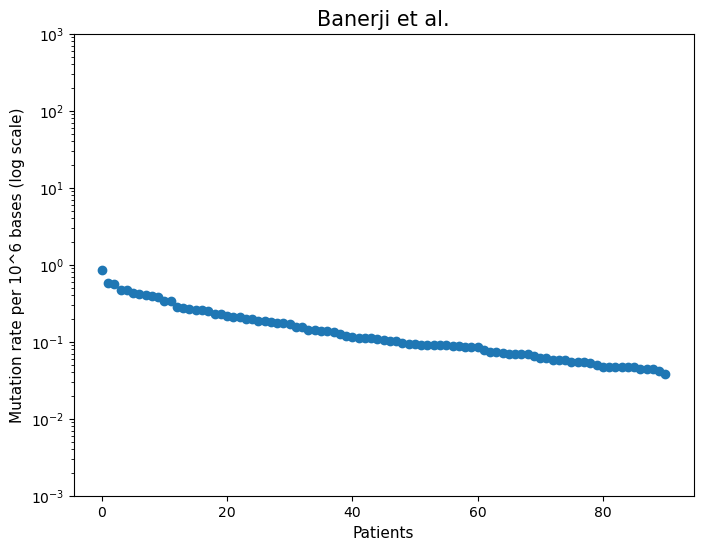

In [20]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 6)
plt.yscale("log") 
#set axes limit
plt.ylim(0.001, 1000)
plt.scatter(patients_TOTAL_ductal, mutation_rate_TOTAL_ductal)
plt.xlabel("Patients", fontsize=11)
plt.ylabel("Mutation rate per 10^6 bases (log scale)", fontsize=11)
plt.title("Banerji et al.", fontsize=15)
plt.show()

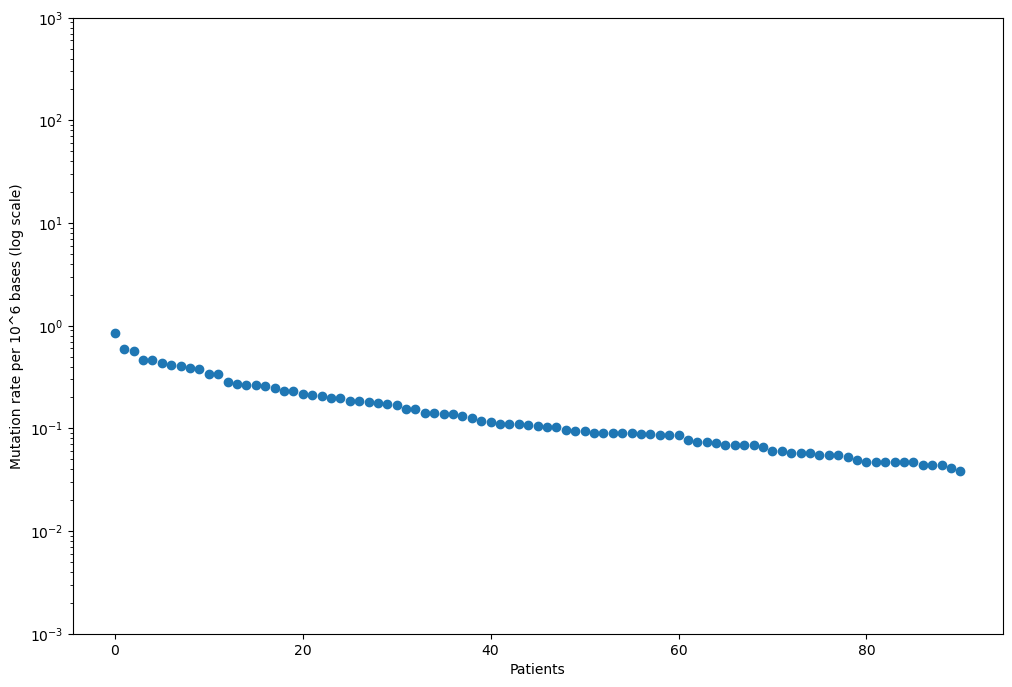

In [21]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 8)
plt.yscale("log") 
#set axes limit
plt.ylim(0.001, 1000)
plt.scatter(patients_TOTAL_ductal, mutation_rate_TOTAL_ductal)
plt.xlabel("Patients")
plt.ylabel("Mutation rate per 10^6 bases (log scale)")
plt.show()

### Study of the thresholds with KneeLocator

In [22]:
colonne_iper = ['Studio', 'x_max', 'mutation rate x_max', 'x_max+1', 'mutation_rate x_max+1', 'gap']
df_soglia_iper = pd.DataFrame(columns = colonne_iper)

86
dx_3: 85
yx_3: -1.3290259894710559
dx_4: 86
yx_4: -1.3553549281934052
gap_max 0.026328938722349315
dim_finale_x_sx: 85
dim_inizio_y_sx: 6
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84]
[-0.06811322 -0.23109531 -0.24984474 -0.33416563 -0.33416563 -0.36357526
 -0.38338365 -0.3892132  -0.4102558  -0.42275434 -0.46605323 -0.46605323
 -0.55087474 -0.56824884 -0.57270318 -0.58175131 -0.58634706 -0.6052324
 -0.63519562 -0.63519562 -0.66184782 -0.67298419 -0.68441365 -0.70821656
 -0.70821656 -0.73340011 -0.73340011 -0.73993098 -0.75329494 -0.76013436
 -0.77414508 -0.81128688 -0.81128688 -0.85190473 -0.85190473 -0.86050491
 -0.86050491 -0.87823367 -0.89671708 -0.92600646 -0.93622562 -0.95741492
 -0.95741492 -0.95741492 -0.9684103  -0.97969131 -0.99127319 -0.99127319
 -1.01540687 -1.

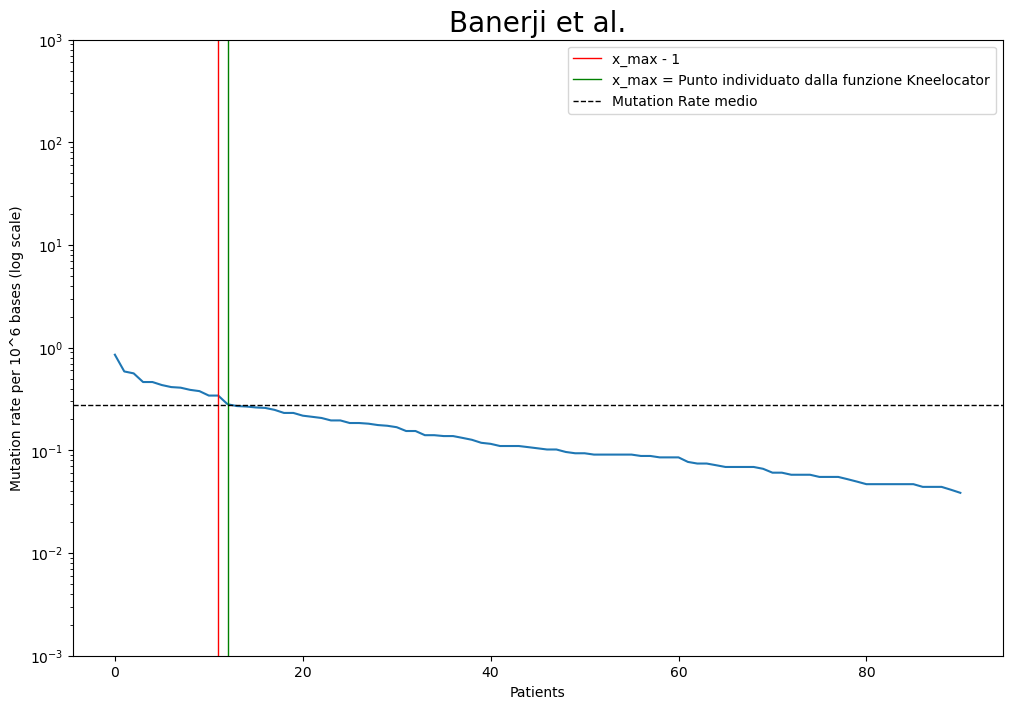

In [23]:
from kneed import KneeLocator, DataGenerator as dg

x_Banerji=patients_TOTAL_ductal
y_Banerji=np.array(np.log10(mutation_TOTAL_ductal_group_by_pts['Mutation_rate*10^6']))

#punto di destra
kl = KneeLocator(x_Banerji, y_Banerji, S=0.1, curve="convex", direction="decreasing", online = True)
print(kl.knee)

x4 = kl.knee #primo punto che si trova considerando l'intera curva
y4 = y_Banerji[x4]
x3 = kl.knee - 1    #x3 è minore di x4; visto che la funzione è decrescente y3 sarà maggiore di y4
y3 = y_Banerji[x3]
dim_inizio_x = 0
dim_finale_x = len(x_Banerji)
dim_inizio_y = 0
dim_finale_y = len(y_Banerji) 

print('dx_3:', x3)   
print('yx_3:', y3)   
print('dx_4:', x4)   
print('yx_4:', y4)   

gap_max_Banerji = abs(y4 - y3) # visto che la funzione è decrescente. Il gap si riferisce alla ripidità della curva.
print('gap_max', gap_max_Banerji) 
x_max_Banerji = x3

dim_finale_x = x3
print('dim_finale_x_sx:', dim_finale_x)   
dim_inizio_y = dim_finale_y - x3    # !! In questo modo, i sotto-intervalli considerati sia per x che per y sono uguali
print('dim_inizio_y_sx:', dim_inizio_y)   

x_sub = x_Banerji[0:dim_finale_x] 
y_sub = y_Banerji[0:x3] 
# x_sub e y_sub hanno la stessa lunghezza

print(x_sub)
print(y_sub)

while (dim_finale_x > 2): # Questo limite (1) può variare in base al dataset
    kl = KneeLocator(x_sub, y_sub, S=0.1, curve="convex", direction="decreasing", online = True)
    print(kl.knee)

    x4 = kl.knee
    y4 = y_Banerji[x4]
    x3 = kl.knee - 1
    y3 = y_Banerji[x3]

    print('dx_3:', x3)   
    print('yx_3:', y3)
    print('dx_4:', x4)
    print('yx_4:', y4)

    gap = abs(y4 - y3) # essendo la funzione decrescente, se x4 > x3, allora y4 < y3 
    print('gap', gap)

    if gap > gap_max_Banerji: # aggiorna il gap massimo!!!
        gap_max_Banerji = gap
        print('gap_max:',gap_max_Banerji)
        x_max_Banerji = x4  # x4 > x3
        print('x:', x_max_Banerji)
    

    dim_finale_x = x3
    print('dim_finale_x:', dim_finale_x)
    dim_inizio_y = dim_finale_y - x3
    print('dim_inizio_y:', dim_inizio_y)

    x_sub = x_Banerji[0:dim_finale_x]
    y_sub = y_Banerji[0:x3]

    print(x_sub)
    print(y_sub)

y_max_Banerji_inf = array_mutation_rate_TOTAL_ductal[x_max_Banerji+1]
y_max_Banerji_sup = array_mutation_rate_TOTAL_ductal[x_max_Banerji]
y_max_Banerji_avg = (y_max_Banerji_inf + y_max_Banerji_sup)/2
y_grafico_media = (y_Banerji[x_max_Banerji]+y_Banerji[x_max_Banerji-1])/2
print('gap_max:',gap_max_Banerji)
print('x:',x_max_Banerji)
print('mutation rate inf:', y_max_Banerji_inf)
print('mutation rate sup:', y_max_Banerji_sup)
print('mutation rate avg:', y_max_Banerji_avg)
fig = plt.figure(figsize=(12, 8))
plt.plot(patients_TOTAL_ductal, mutation_rate_TOTAL_ductal)
plt.yscale("log")
plt.xlabel("Patients")
plt.ylabel("Mutation rate per 10^6 bases (log scale)")
plt.title ("Banerji et al.",fontsize=20)
plt.axvline(x=x_max_Banerji-1, color='red', linestyle='-', linewidth = 1,  label = 'x_max - 1')
plt.axvline(x=x_max_Banerji, color='green', linestyle='-', linewidth = 1, label = 'x_max = Punto individuato dalla funzione Kneelocator')
plt.axhline(y=y_max_Banerji_avg, color='black', linestyle='--', linewidth = 1, label = 'Mutation Rate medio')
plt.legend()
#set axes limit
plt.ylim(0.001, 1000)
plt.show()

#'Studio', 'x_max', 'mutation rate x_max', 'x_max+1', 'mutation_rate x_max+1', 'gap'
#df_soglia_iper = df_soglia_iper.append({'Studio': 'Banerji et al.', 'x_max': x_max_Banerji, 'mutation rate x_max':y_max_Banerji_sup,  'x_max+1': x_max_Banerji+1, 'mutation_rate x_max+1': y_max_Banerji_inf,'gap': gap_max_Banerji }, ignore_index=True)

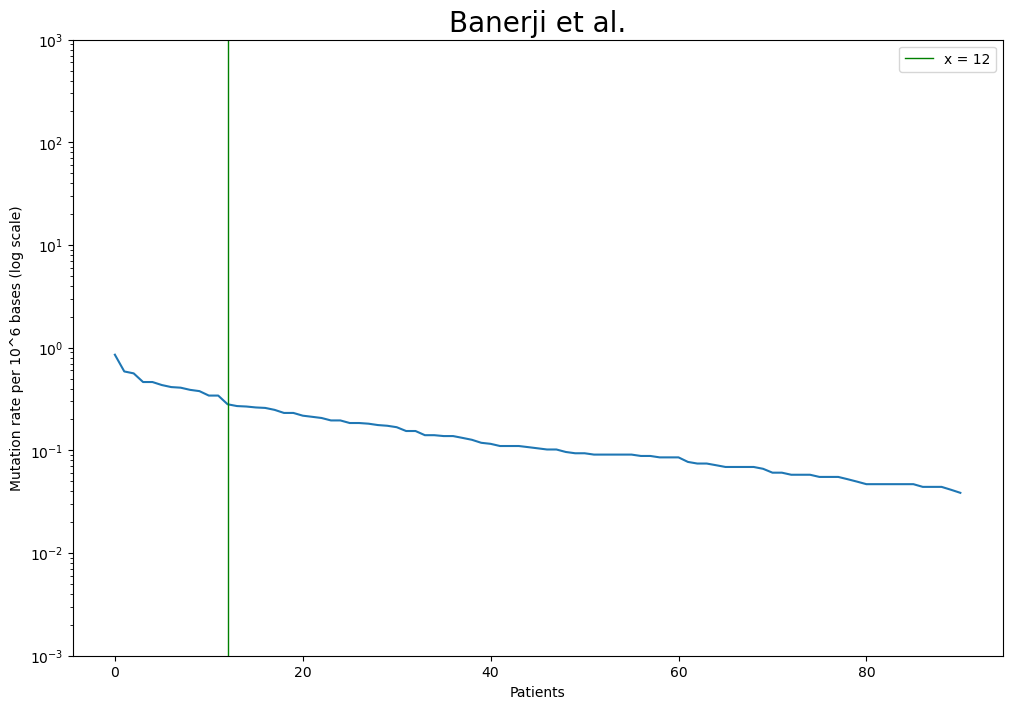

In [24]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 8)
plt.yscale("log") 
#set axes limit
plt.ylim(0.001, 1000)
plt.plot(patients_TOTAL_ductal, mutation_rate_TOTAL_ductal)
plt.xlabel("Patients")
plt.ylabel("Mutation rate per 10^6 bases (log scale)")
plt.axvline(x=12, color='green', linestyle='-', linewidth = 1, label='x = 12')
plt.title ("Banerji et al.",fontsize=20)
plt.legend()
plt.show()

## Zoom

(0.2178472993894959, 0.854843833047389)

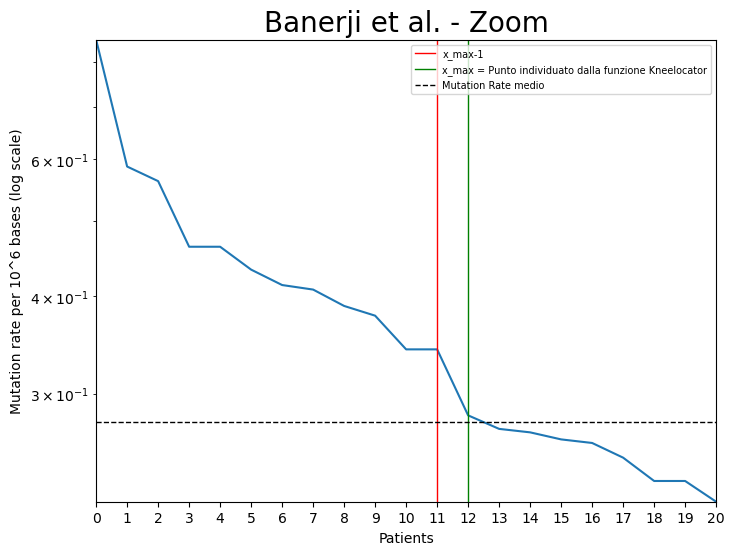

In [25]:
%matplotlib inline
fig = plt.figure(figsize=(8, 6))
plt.plot(patients_TOTAL_ductal, mutation_rate_TOTAL_ductal)
plt.xticks(np.arange(min(patients_TOTAL_ductal), max(patients_TOTAL_ductal)+1, 1.0))
plt.yscale("log")
plt.xlabel("Patients")
plt.ylabel("Mutation rate per 10^6 bases (log scale)")
plt.title ("Banerji et al. - Zoom",fontsize=20)
#plt.axvline(x=x_max_Banerji+1, color='red', linestyle='-')
x1_Banerji, y1_Banerji = (patients_TOTAL_ductal[0], patient_mutation_rate_TOTAL_ductal.loc[0, 'Mutation_rate*10^6'])
x2_Banerji, y2_Banerji = (patients_TOTAL_ductal[20], patient_mutation_rate_TOTAL_ductal.loc[20, 'Mutation_rate*10^6'])
plt.axvline(x=x_max_Banerji-1, color='red', linestyle='-', linewidth = 1,  label = 'x_max-1')
plt.axvline(x=x_max_Banerji, color='green', linestyle='-', linewidth = 1, label = 'x_max = Punto individuato dalla funzione Kneelocator')
plt.axhline(y=y_max_Banerji_avg, color='black', linestyle='--', linewidth = 1, label = 'Mutation Rate medio')
plt.legend(loc='upper right', fontsize = 7)
plt.gca().set_xlim(x1_Banerji, x2_Banerji)
plt.gca().set_ylim(y2_Banerji, y1_Banerji)

In [26]:
# create a table containing the iterated values: x3, y3, x4, y4, gap. For each row, one iteration.

x_Banerji=patients_TOTAL_ductal
y_Banerji=np.array(np.log10(mutation_TOTAL_ductal_group_by_pts['Mutation_rate*10^6']))

#punto di destra
kl = KneeLocator(x_Banerji, y_Banerji, S=0.1, curve="convex", direction="decreasing", online = True)

x4 = kl.knee #primo punto che si trova considerando l'intera curva
y4 = y_Banerji[x4]
x3 = kl.knee -1 # x3 è minore di x4; visto che la funzione è decrescente y3 sarà maggiore di y4
y3 = y_Banerji[x3]
dim_inizio_x = 0
dim_finale_x = len(x_Banerji) #164
dim_inizio_y = 0
dim_finale_y = len(x_Banerji) #164

gap_Banerji = abs(y4 - y3) # visto che la funzione è decrescente. Il gap si riferisce alla ripidità della curva.
x_max_Banerji = x3

data = [[x4, y4, x3, y3, gap_Banerji]] # inizializzo data con il primo risultato di Kneelocator

dim_finale_x = x3
dim_inizio_y = dim_finale_y - x3 # !! In questo modo, i sub-intervalli considerati sia per x che per y sono uguali

x_sub = x_Banerji[0:dim_finale_x] # da 0 a 156 --> 156 = lunghezza del vettore
y_sub = y_Banerji[0:x3] # da 8 a 164 --> 156 = lunghezza del vettore
# x_sub e y_sub hanno la stessa lunghezza

while (dim_finale_x > 2): # Questo limite (1) può variare in base al dataset
    kl = KneeLocator(x_sub, y_sub, S=0.1, curve="convex", direction="decreasing", online = True)
    
    x4 = kl.knee
    y4 = y_Banerji[x4]
    x3 = kl.knee - 1
    y3 = y_Banerji[x3]
    gap = abs(y4 - y3) # essendo la funzione decrescente, se x4 > x3, allora y4 < y3 

    data.append([x4, y4, x3, y3, gap])
  
    dim_finale_x = x3
    dim_inizio_y = dim_finale_y - x3
    dim_finale_y = x3
   
    x_sub = x_Banerji[0:x3]
    y_sub = y_Banerji[0:x3]
    
cols=['x4','y4','x3','y3','gap']
result_KneeLocator = pd.DataFrame(data, columns=cols)  
result_KneeLocator

,x4,y4,x3,y3,gap
0,86,-1.355355,85,-1.329026,0.026329
1,80,-1.329026,79,-1.304202,0.024824
2,75,-1.258445,74,-1.237256,0.021189
3,72,-1.237256,71,-1.217052,0.020203
4,65,-1.161535,64,-1.144502,0.017033
5,61,-1.112317,60,-1.068113,0.044204
6,48,-1.015407,47,-0.991273,0.024134
7,41,-0.957415,40,-0.936226,0.021189
8,33,-0.851905,32,-0.811287,0.040618
9,25,-0.733400,24,-0.708217,0.025184


In [27]:
# save the dataset 
result_KneeLocator.to_csv('Points_foundbyKneeLocator_Banerji.csv', index=False, sep=',')

### Mutation Frequency analysis

In [28]:
genes_patients_TOTAL_ductal=data_mutation_TOTAL_ductal[['PATIENT_ID', 'Hugo_Symbol']]

In [29]:
genes_patients_TOTAL_ductal=genes_patients_TOTAL_ductal.drop_duplicates()

In [30]:
n_of_pts_per_gene_TOTAL_ductal= genes_patients_TOTAL_ductal.groupby(['Hugo_Symbol'])['PATIENT_ID'].count().reset_index()
n_of_pts_per_gene_TOTAL_ductal.rename(columns = {'PATIENT_ID':'Num_pts_per_gene'}, inplace = True)

In [31]:
tot_pts_TOTAL_ductal = 91 

In [32]:
# add a column to the n_of_pts_per_gene dataframe representing the mutation frequency for each gene
n_of_pts_per_gene_TOTAL_ductal["Mutation_frequency (%)"] = (n_of_pts_per_gene_TOTAL_ductal["Num_pts_per_gene"]*100)/tot_pts_TOTAL_ductal

In [33]:
# the numbers of patients per gene are sorted in descending order
n_of_pts_per_gene_TOTAL_ductal= n_of_pts_per_gene_TOTAL_ductal.sort_values(by="Num_pts_per_gene", ascending=False)

In [34]:
gene_mutation_frequency_TOTAL_ductal = n_of_pts_per_gene_TOTAL_ductal[['Hugo_Symbol', 'Mutation_frequency (%)']]

In [35]:
# select the first 50 genes
highest_mutated_genes_TOTAL_ductal=gene_mutation_frequency_TOTAL_ductal.head(50)

In [36]:
mutated_gene_names=highest_mutated_genes_TOTAL_ductal['Hugo_Symbol'].tolist()

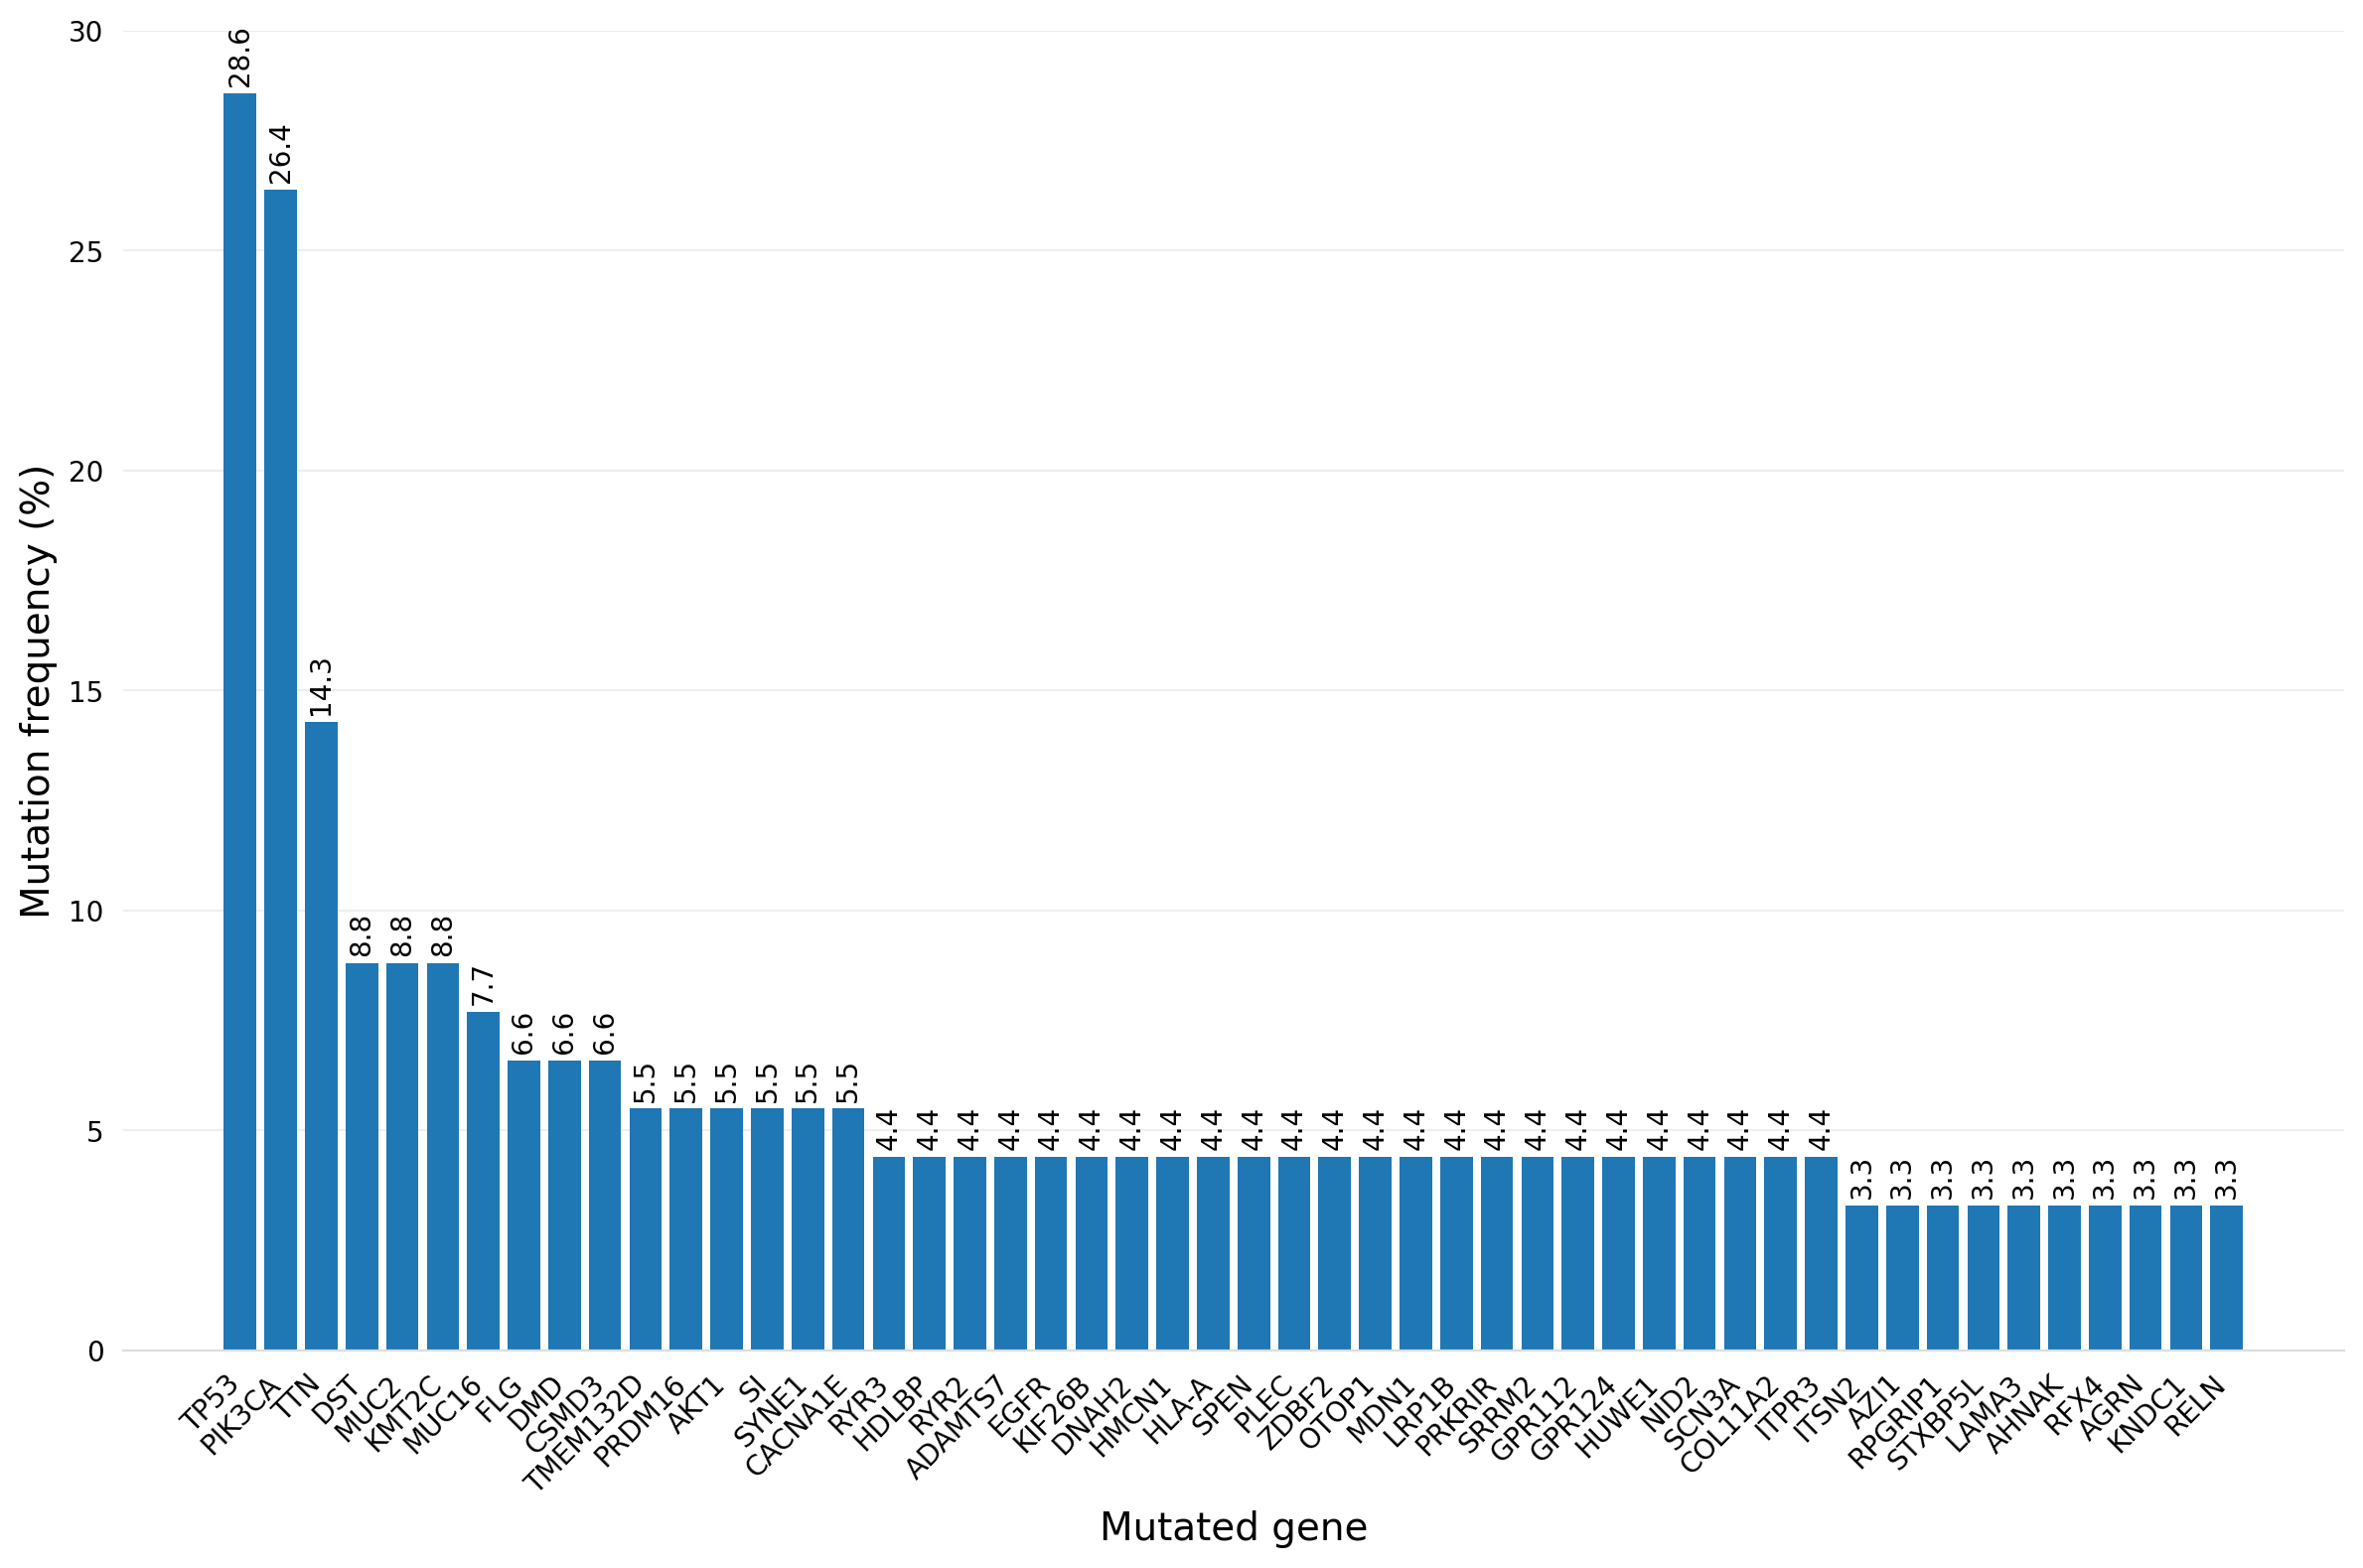

In [37]:
# increase the quality and resolution of the chart
from IPython.display import set_matplotlib_formats
import matplotlib_inline.backend_inline

matplotlib_inline.backend_inline.set_matplotlib_formats('retina')
# set default figure size.
plt.rcParams['figure.figsize'] = (12, 8)
fig, ax = plt.subplots()
h=ax.bar(highest_mutated_genes_TOTAL_ductal['Hugo_Symbol'], highest_mutated_genes_TOTAL_ductal['Mutation_frequency (%)'], label=mutated_gene_names)
xticks_pos = [0.65*patch.get_width() + patch.get_xy()[0] for patch in h]

_ = plt.xticks(xticks_pos, mutated_gene_names,  ha='right', rotation=45)
#plt.title('Highest mutated genes', fontsize=14)
plt.xlabel('Mutated gene', fontsize=14)
plt.ylabel('Mutation frequency (%)', fontsize=14)


# First, let's remove the top, right and left spines (figure borders)
# which really aren't necessary for a bar chart.
# Also, make the bottom spine gray instead of black.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')

# Second, remove the ticks as well.
ax.tick_params(bottom=False, left=False)

# Third, add a horizontal grid (but keep the vertical grid hidden).
# Color the lines a light gray as well.
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

# Add text annotations to the top of the bars.
# Note, you'll have to adjust this slightly (the 0.3)
# with different data.
for bar in h:
  ax.text(
      bar.get_x() + bar.get_width() / 2,
      bar.get_height() + 0.3,
      round(bar.get_height(), 1),
      rotation='vertical',
      horizontalalignment='center'
  )


fig.tight_layout()

# DUCTAL and TRIPLE-NEGATIVE 

### Mutation Rate analysis

In [38]:
data_mutation_ductal_TN=pd.read_csv('mutation_table_Banerji_et_al_Broad_Nature2012_TN_ductal.csv', sep=None, engine='python')
# delete the first column, that shows the number of each row
data_mutation_ductal_TN = data_mutation_ductal_TN.iloc[:, 1:]
data_mutation_ductal_TN

,PATIENT_ID,Tumor_Sample_Barcode,Hugo_Symbol,Chromosome,Start_Position,End_Position,Variant_Classification,Variant_Type,Reference_Allele,Tumor_Seq_Allele1,Tumor_Seq_Allele2,HGVSc,HGVSp_Short,Protein_position,Transcript_ID,Gene_length
0,BR-M-045,BR-M-045,ABCA9,17,66980259,66980265,Frame_Shift_Del,DEL,GTGGGTG,-,-,ENST00000340001.4:c.4431_4437del,p.H1479Wfs*19,1477.0,ENST00000340001,86577
1,BR-M-045,BR-M-045,ADAD2,16,84228910,84228910,Missense_Mutation,SNP,C,-,A,ENST00000268624.3:c.988C>A,p.R330S,330.0,ENST00000268624,6031
2,BR-M-045,BR-M-045,AKAP9,7,91645550,91645550,Silent,SNP,A,-,T,ENST00000356239.3:c.3720A>T,p.P1240=,1240.0,ENST00000356239,169807
3,BR-M-045,BR-M-045,ANGEL1,14,77275857,77275857,Missense_Mutation,SNP,C,-,G,ENST00000251089.2:c.194G>C,p.R65P,65.0,ENST00000251089,39002
4,BR-M-045,BR-M-045,ANKRD30A,10,37508262,37508262,Missense_Mutation,SNP,G,-,T,ENST00000361713.1:c.3454G>T,p.D1152Y,1152.0,ENST00000361713,258255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,BR-M-174,BR-M-174,UPRT,X,74494112,74494112,Missense_Mutation,SNP,C,-,T,ENST00000373383.4:c.23C>T,p.P8L,8.0,ENST00000373383,30516
272,BR-M-174,BR-M-174,WDR1,4,10099376,10099376,Missense_Mutation,SNP,A,-,C,ENST00000499869.2:c.517T>G,p.F173V,173.0,ENST00000499869,42611
273,BR-M-174,BR-M-174,YEATS2,3,183471914,183471914,Missense_Mutation,SNP,G,-,C,ENST00000305135.5:c.1151G>C,p.G384A,384.0,ENST00000305135,114808
274,BR-M-174,BR-M-174,ZFAND3,6,38084369,38084369,Missense_Mutation,SNP,C,-,A,ENST00000287218.4:c.383C>A,p.A128D,128.0,ENST00000287218,335126


In [39]:
# check if there are duplicate rows 
data_mutation_ductal_TN.duplicated().sum()

0

In [40]:
# add a column to the dataset representing the mutated bases length (End_Position-Start_Position+1)
data_mutation_ductal_TN.loc[:, 'Mutation_length'] = data_mutation_ductal_TN['End_Position']-data_mutation_ductal_TN['Start_Position']+1

In [41]:
data_mutation_ductal_TN['PATIENT_ID'].nunique()

4

In [42]:
# extract PATIENT_ID and Mutation_length
pts_mutation_length_ductal_TN = data_mutation_ductal_TN[['PATIENT_ID', 'Mutation_length']]

In [43]:
# group by PATIENT_ID and sum the mutation lengths for each pts
mutation_ductal_TN_group_by_pts=pts_mutation_length_ductal_TN.groupby(['PATIENT_ID'])['Mutation_length'].sum().reset_index()
mutation_ductal_TN_group_by_pts.rename(columns = {'Mutation_length':'Total_sum_mutated_bases'}, inplace = True)

In [44]:
# extract Hugo_Symbol and Gene_length
gene_length_for_each_mutation_ductal_TN = data_mutation_ductal_TN[['Hugo_Symbol', 'Gene_length']]

In [45]:
# look at the number of distinct genes
gene_length_for_each_mutation_ductal_TN['Hugo_Symbol'].nunique()

271

In [46]:
# group by gene (Hugo_Symbol) 
mutation_ductal_TN_group_by_gene=gene_length_for_each_mutation_ductal_TN.groupby(['Hugo_Symbol'])['Gene_length'].max().reset_index()

In [47]:
# compute the total gene length (for all the genes in the dataset)
total_GeneLength_ductal_TN = mutation_ductal_TN_group_by_gene['Gene_length'].sum()

In [48]:
# add a column to the dataset representing the mutation rate for each patient (Mutation_rate= Mutation_length/total_gene_length)
mutation_ductal_TN_group_by_pts["Mutation_rate"] = mutation_ductal_TN_group_by_pts["Total_sum_mutated_bases"]/total_GeneLength_ductal_TN

In [49]:
# multiply the Mutation_rate values for 10^6
mutation_ductal_TN_group_by_pts["Mutation_rate*10^6"] = mutation_ductal_TN_group_by_pts["Mutation_rate"]*1000000

In [50]:
# the PATIENT_IDs are sorted for descending order of mutation rate 
mutation_ductal_TN_group_by_pts= mutation_ductal_TN_group_by_pts.sort_values(by="Mutation_rate", ascending=False)

In [51]:
patient_mutation_rate_ductal_TN=mutation_ductal_TN_group_by_pts[['PATIENT_ID', 'Mutation_rate*10^6' ]]

In [52]:
patients=np.arange(0,4,1)
# convert a series into a Numpy array
mutation_rate=mutation_ductal_TN_group_by_pts[['Mutation_rate*10^6']].to_numpy()

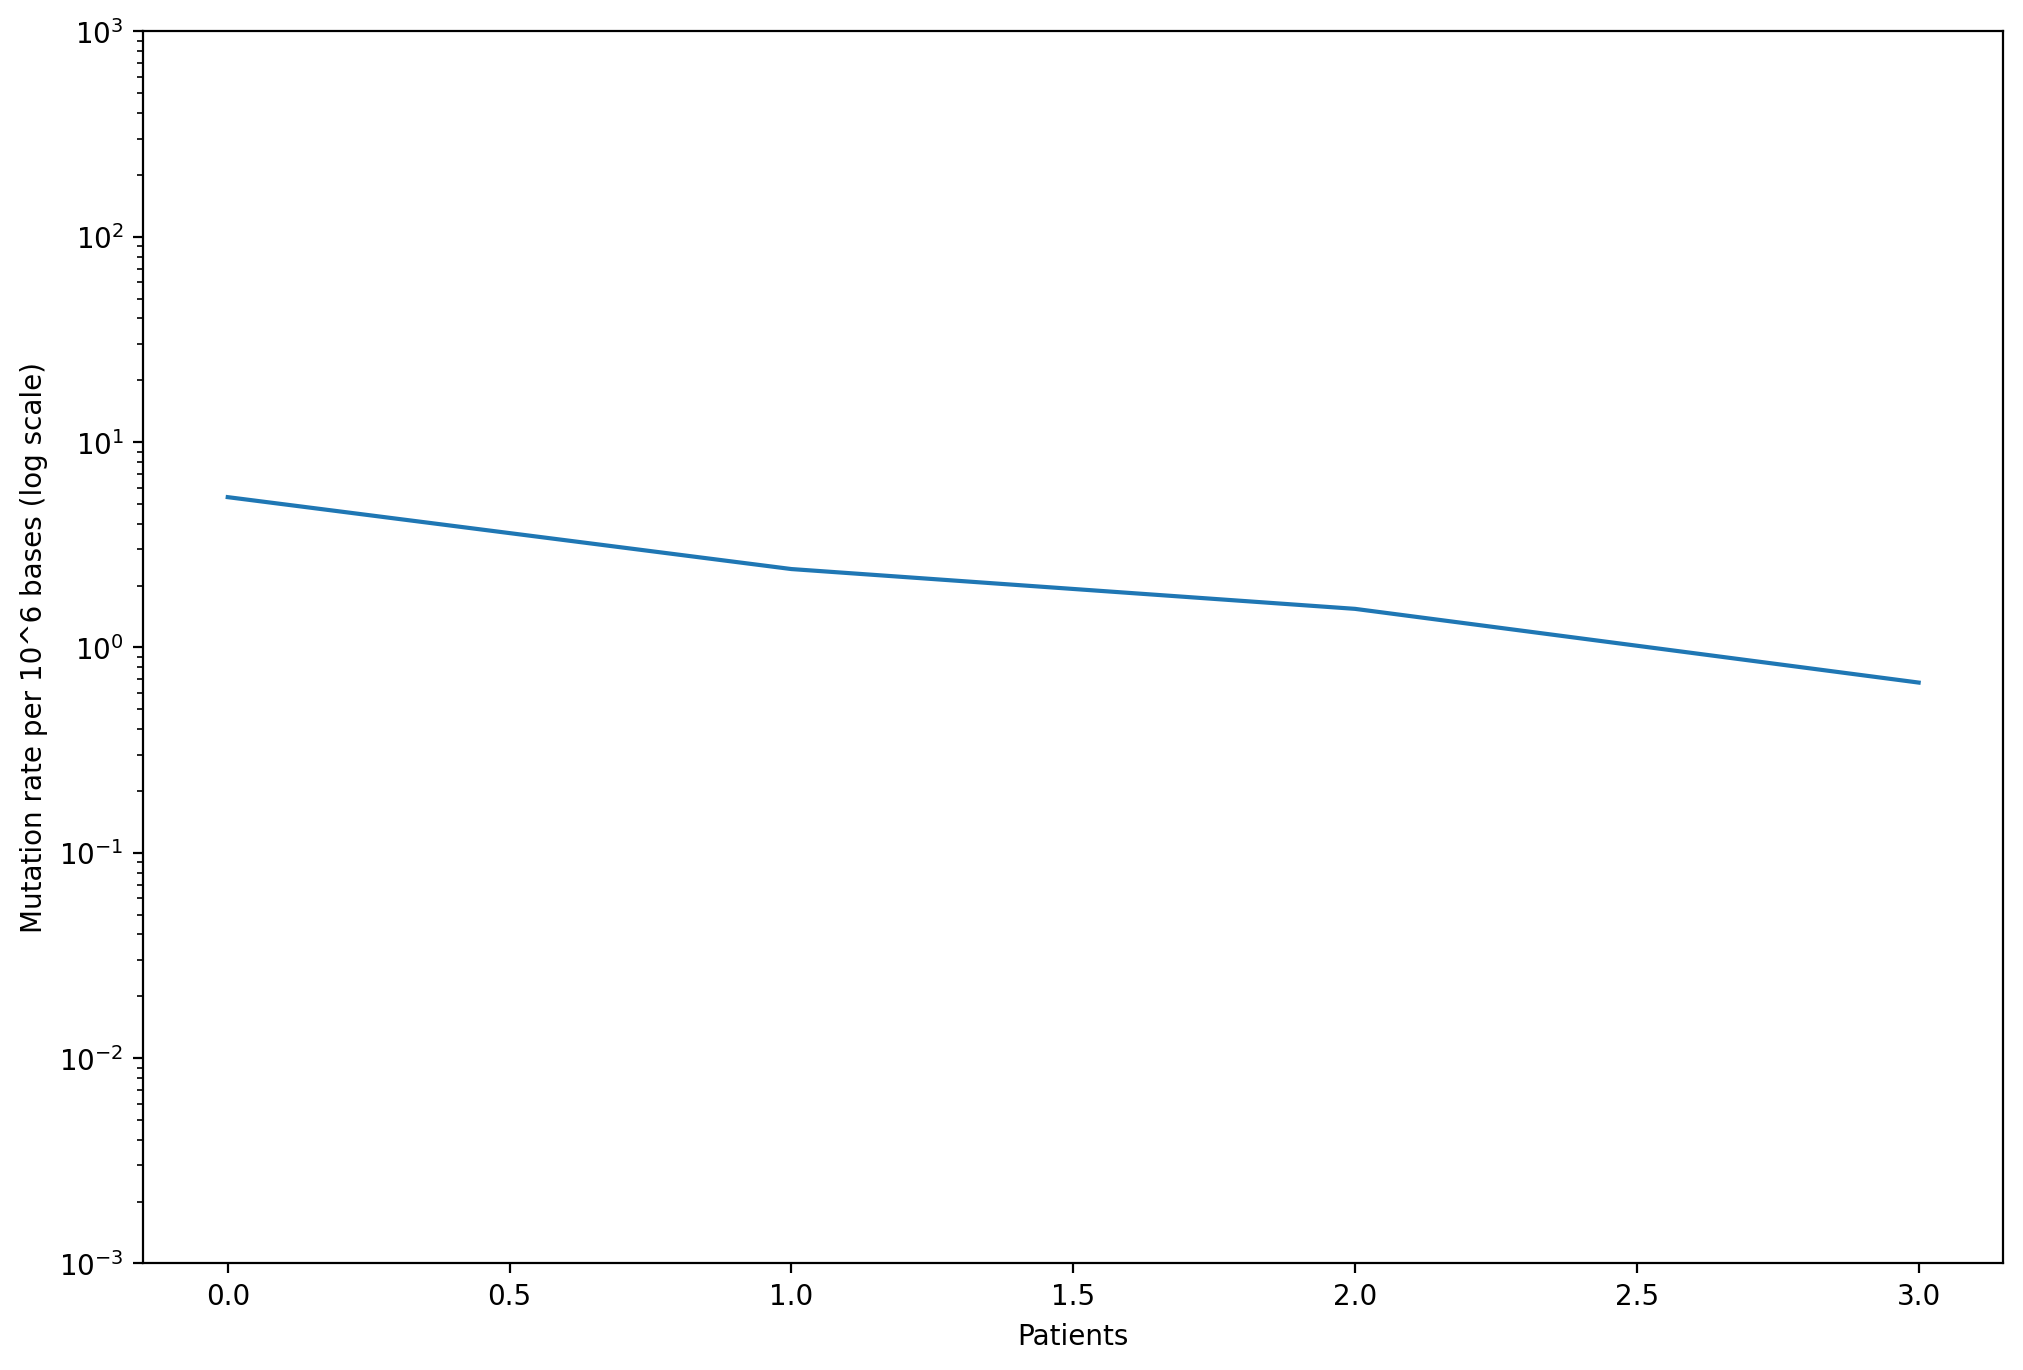

In [53]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 8)
plt.yscale("log") 
#set axes limit
plt.ylim(0.001, 1000)
plt.plot(patients, mutation_rate)
plt.xlabel("Patients")
plt.ylabel("Mutation rate per 10^6 bases (log scale)")
plt.show()

### Mutation Frequency analysis

In [54]:
genes_patients_ductal_TN=data_mutation_ductal_TN[['PATIENT_ID', 'Hugo_Symbol']]

In [55]:
genes_patients_ductal_TN=genes_patients_ductal_TN.drop_duplicates()

In [56]:
n_of_pts_per_gene_ductal_TN= genes_patients_ductal_TN.groupby(['Hugo_Symbol'])['PATIENT_ID'].count().reset_index()
n_of_pts_per_gene_ductal_TN.rename(columns = {'PATIENT_ID':'Num_pts_per_gene'}, inplace = True)

In [57]:
tot_pts_ductal_TN = 4

In [58]:
# add a column to the n_of_pts_per_gene dataframe representing the mutation frequency for each gene
n_of_pts_per_gene_ductal_TN["Mutation_frequency (%)"] = (n_of_pts_per_gene_ductal_TN["Num_pts_per_gene"]*100)/tot_pts_ductal_TN

In [59]:
# the numbers of patients per gene are sorted in descending order
n_of_pts_per_gene_ductal_TN= n_of_pts_per_gene_ductal_TN.sort_values(by="Num_pts_per_gene", ascending=False)

In [60]:
gene_mutation_frequency_ductal_TN = n_of_pts_per_gene_ductal_TN[['Hugo_Symbol', 'Mutation_frequency (%)']]

In [61]:
# select the first 50 genes
highest_mutated_genes_ductal_TN=gene_mutation_frequency_ductal_TN.head(50)

In [62]:
mutated_gene_names=highest_mutated_genes_ductal_TN['Hugo_Symbol'].tolist()

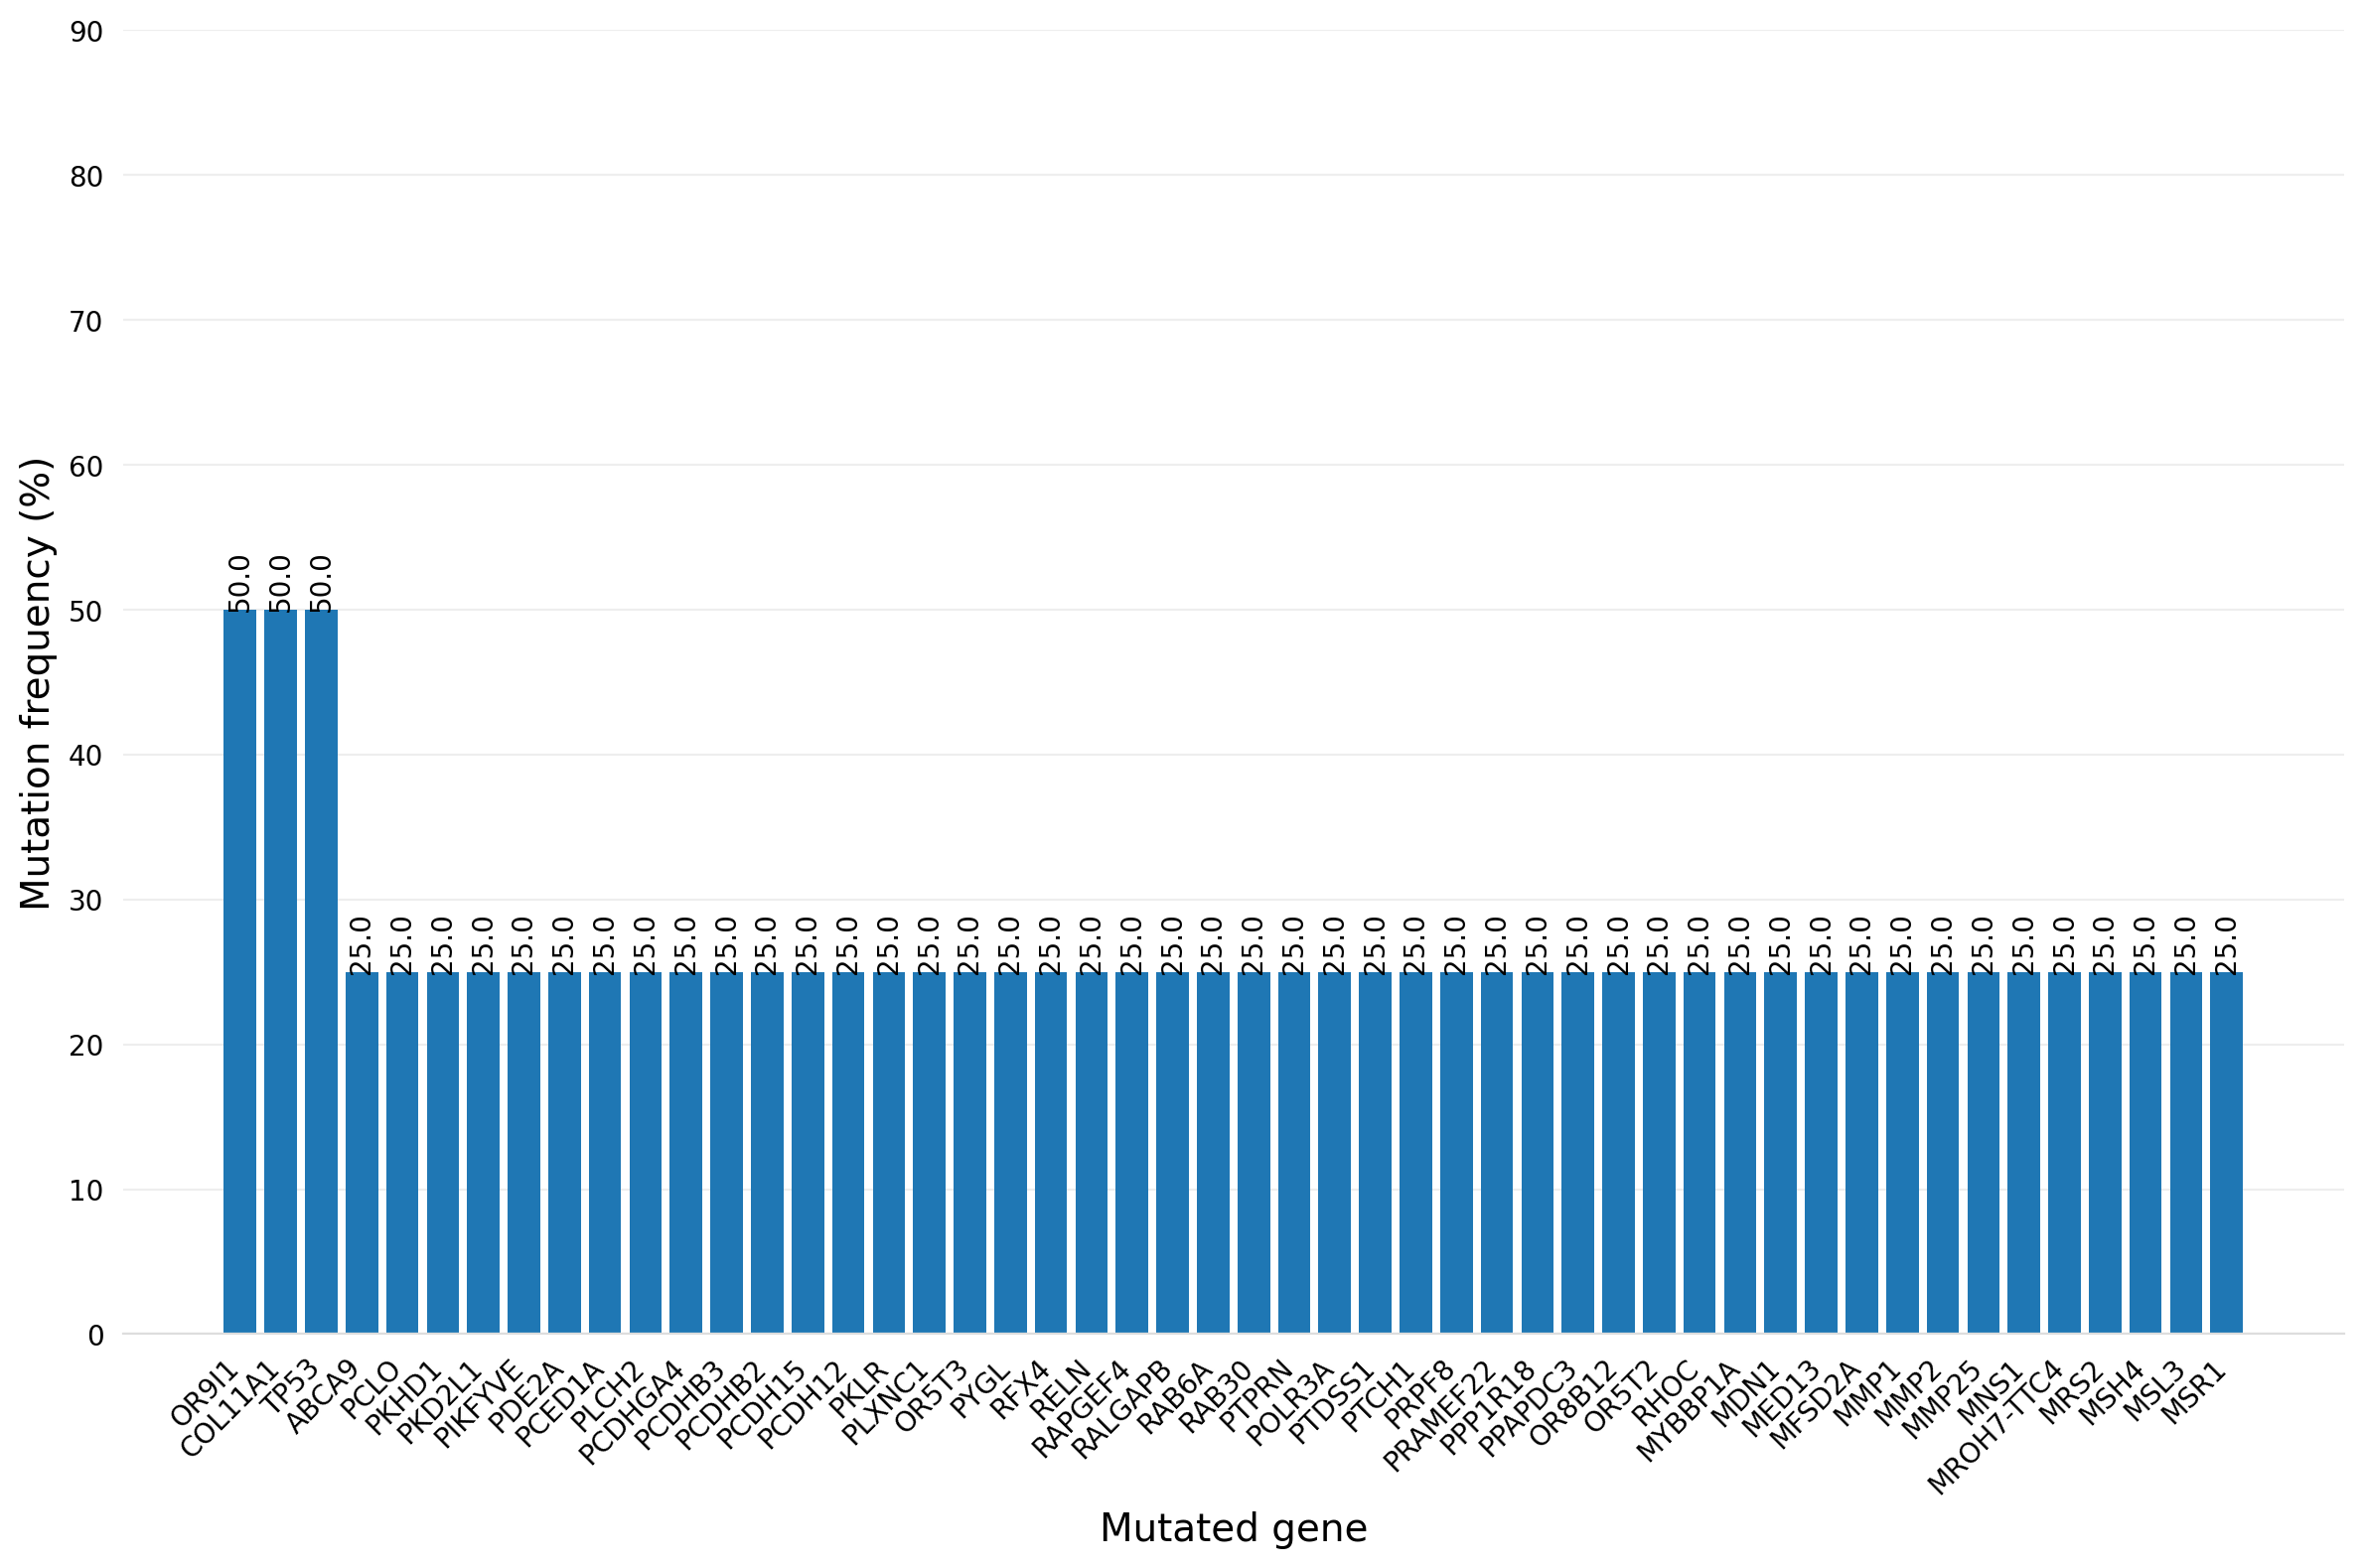

In [63]:
# increase the quality and resolution of the chart
from IPython.display import set_matplotlib_formats
import matplotlib_inline.backend_inline

matplotlib_inline.backend_inline.set_matplotlib_formats('retina')
# set default figure size.
plt.rcParams['figure.figsize'] = (12, 8)
fig, ax = plt.subplots()
h=ax.bar(highest_mutated_genes_ductal_TN['Hugo_Symbol'], highest_mutated_genes_ductal_TN['Mutation_frequency (%)'], label=mutated_gene_names)
xticks_pos = [0.65*patch.get_width() + patch.get_xy()[0] for patch in h]

_ = plt.xticks(xticks_pos, mutated_gene_names,  ha='right', rotation=45)
#plt.title('Highest mutated genes', fontsize=14)
plt.xlabel('Mutated gene', fontsize=14)
plt.ylabel('Mutation frequency (%)', fontsize=14)

plt.ylim(0, 90)

# First, let's remove the top, right and left spines (figure borders)
# which really aren't necessary for a bar chart.
# Also, make the bottom spine gray instead of black.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')

# Second, remove the ticks as well.
ax.tick_params(bottom=False, left=False)

# Third, add a horizontal grid (but keep the vertical grid hidden).
# Color the lines a light gray as well.
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

# Add text annotations to the top of the bars.
# Note, you'll have to adjust this slightly (the 0.3)
# with different data.
for bar in h:
  ax.text(
      bar.get_x() + bar.get_width() / 2,
      bar.get_height() + 0.3,
      round(bar.get_height(), 1),
      rotation='vertical',
      horizontalalignment='center'
  )


fig.tight_layout()

# DUCTAL NON TRIPLE-NEGATIVE 

In [64]:
data_mutation_ductal_NON_TN=pd.read_csv('mutation_table_Banerji_et_al_Broad_Nature2012_NON_TN_ductal.csv', sep=None, engine='python')
# delete the first column, that shows the number of each row
data_mutation_ductal_NON_TN = data_mutation_ductal_NON_TN.iloc[:, 1:]
data_mutation_ductal_NON_TN

,PATIENT_ID,Tumor_Sample_Barcode,Hugo_Symbol,Chromosome,Start_Position,End_Position,Variant_Classification,Variant_Type,Reference_Allele,Tumor_Seq_Allele1,Tumor_Seq_Allele2,HGVSc,HGVSp_Short,Protein_position,Transcript_ID,Gene_length
0,BR-V-002,BR-V-002,A2M,12,9229398,9229398,Missense_Mutation,SNP,C,-,G,ENST00000318602.7:c.3486G>C,p.K1162N,1162.0,ENST00000318602,48566
1,BR-V-002,BR-V-002,ACTBL2,5,56777819,56777819,Missense_Mutation,SNP,C,-,T,ENST00000423391.1:c.716G>A,p.R239Q,239.0,ENST00000423391,2791
2,BR-V-002,BR-V-002,ZFAND4,10,46143950,46143950,Missense_Mutation,SNP,C,-,T,ENST00000344646.5:c.361G>A,p.E121K,121.0,ENST00000344646,57186
3,BR-V-002,BR-V-002,APEX1,14,20925406,20925406,Silent,SNP,C,-,T,ENST00000216714.3:c.696C>T,p.F232=,232.0,ENST00000216714,2578
4,BR-V-002,BR-V-002,BIRC6,2,32678880,32678880,Missense_Mutation,SNP,T,-,G,ENST00000421745.2:c.4623T>G,p.N1541K,1541.0,ENST00000421745,261871
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4225,BR-M-200,BR-M-200,NUP107,12,69115632,69115632,Silent,SNP,C,-,T,ENST00000229179.4:c.1323C>T,p.V441=,441.0,ENST00000229179,56272
4226,BR-M-200,BR-M-200,OR5I1,11,55703409,55703409,Missense_Mutation,SNP,C,-,A,ENST00000301532.3:c.468G>T,p.M156I,156.0,ENST00000301532,945
4227,BR-M-200,BR-M-200,PTP4A2,1,32377414,32377414,Missense_Mutation,SNP,T,-,C,ENST00000344035.6:c.203A>G,p.D68G,68.0,ENST00000344035,38436
4228,BR-M-200,BR-M-200,SYT3,19,51140602,51140602,Missense_Mutation,SNP,G,-,A,ENST00000338916.4:c.67C>T,p.R23W,23.0,ENST00000338916,47088


In [65]:
# check if there are duplicate rows 
data_mutation_ductal_NON_TN.duplicated().sum()

0

### Mutation Rate analysis

In [66]:
# add a column to the dataset representing the mutated bases length (End_Position-Start_Position+1)
data_mutation_ductal_NON_TN.loc[:, 'Mutation_length'] = data_mutation_ductal_NON_TN['End_Position']-data_mutation_ductal_NON_TN['Start_Position']+1

In [67]:
data_mutation_ductal_NON_TN['PATIENT_ID'].nunique()

87

In [68]:
# extract PATIENT_ID and Mutation_length
pts_mutation_length_ductal_NON_TN = data_mutation_ductal_NON_TN[['PATIENT_ID', 'Mutation_length']]

In [69]:
# group by PATIENT_ID and sum the mutation lengths for each pts
mutation_ductal_NON_TN_group_by_pts=pts_mutation_length_ductal_NON_TN.groupby(['PATIENT_ID'])['Mutation_length'].sum().reset_index()
mutation_ductal_NON_TN_group_by_pts.rename(columns = {'Mutation_length':'Total_sum_mutated_bases'}, inplace = True)

In [70]:
# extract Hugo_Symbol and Gene_length
gene_length_for_each_mutation_ductal_NON_TN = data_mutation_ductal_NON_TN[['Hugo_Symbol', 'Gene_length']]

In [71]:
# look at the number of distinct genes
gene_length_for_each_mutation_ductal_NON_TN['Hugo_Symbol'].nunique()

3334

In [72]:
# group by gene (Hugo_Symbol) 
mutation_ductal_NON_TN_group_by_gene=gene_length_for_each_mutation_ductal_NON_TN.groupby(['Hugo_Symbol'])['Gene_length'].max().reset_index()

In [73]:
# compute the total gene length (for all the genes in the dataset)
total_GeneLength_ductal_NON_TN = mutation_ductal_NON_TN_group_by_gene['Gene_length'].sum()

In [74]:
# add a column to the dataset representing the mutation rate for each patient (Mutation_rate= Mutation_length/total_gene_length)
mutation_ductal_NON_TN_group_by_pts["Mutation_rate"] = mutation_ductal_NON_TN_group_by_pts["Total_sum_mutated_bases"]/total_GeneLength_ductal_NON_TN

In [75]:
# multiply the Mutation_rate values for 10^6
mutation_ductal_NON_TN_group_by_pts["Mutation_rate*10^6"] = mutation_ductal_NON_TN_group_by_pts["Mutation_rate"]*1000000

In [76]:
# the PATIENT_IDs are sorted for descending order of mutation rate 
mutation_ductal_NON_TN_group_by_pts= mutation_ductal_NON_TN_group_by_pts.sort_values(by="Mutation_rate", ascending=False)

In [77]:
patient_mutation_rate_ductal_NON_TN=mutation_ductal_NON_TN_group_by_pts[['PATIENT_ID', 'Mutation_rate*10^6' ]]

In [78]:
patients=np.arange(0,87,1)
# convert a series into a Numpy array
mutation_rate=mutation_ductal_NON_TN_group_by_pts[['Mutation_rate*10^6']].to_numpy()

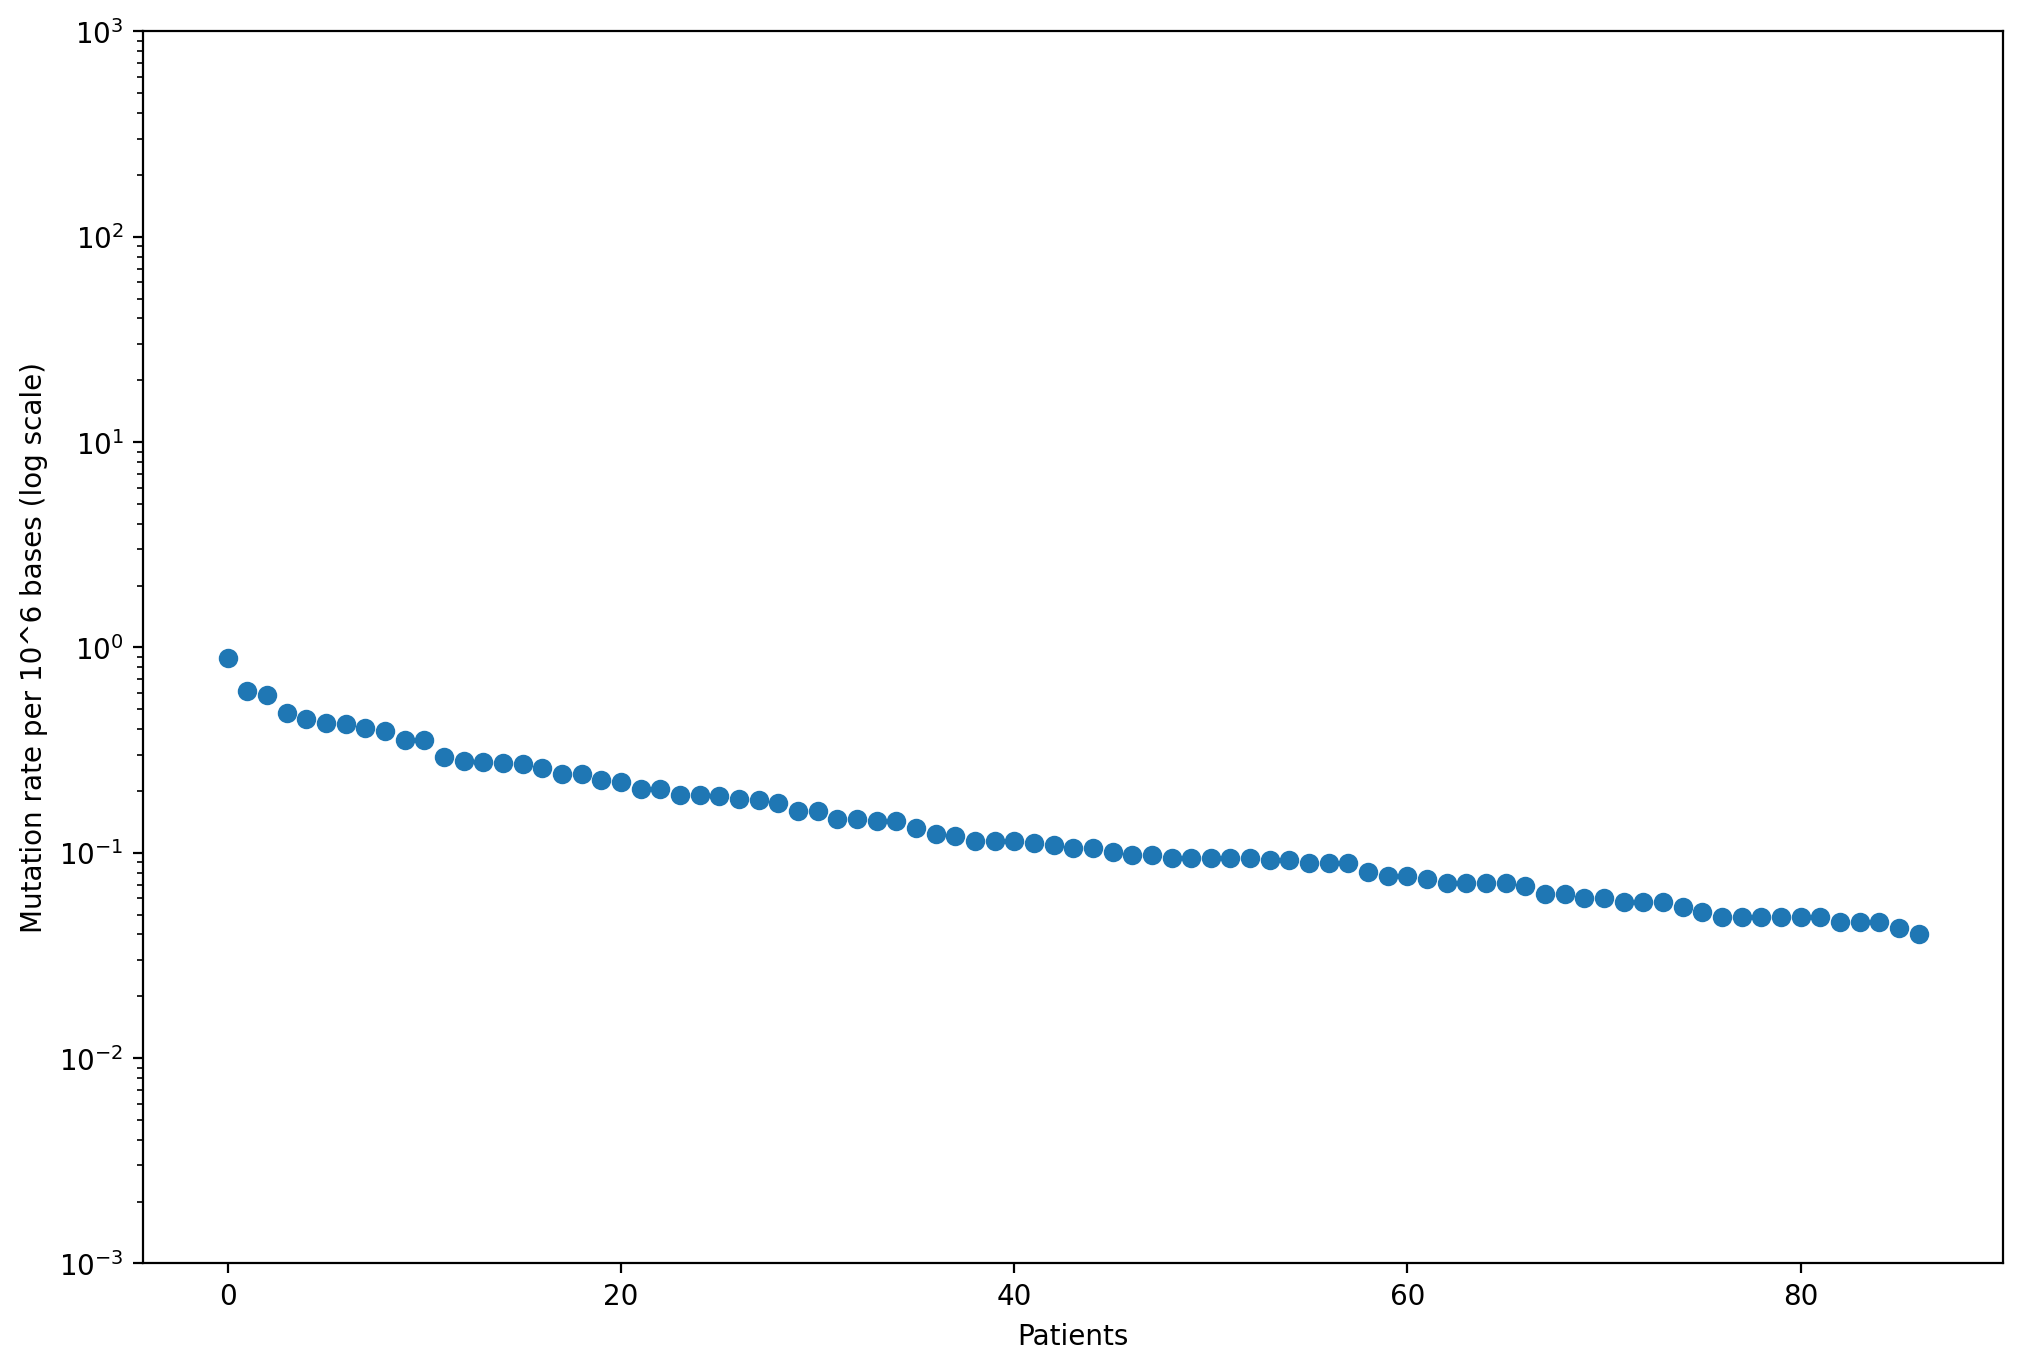

In [79]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 8)
plt.yscale("log") 
#set axes limit
plt.ylim(0.001, 1000)
plt.scatter(patients, mutation_rate)
plt.xlabel("Patients")
plt.ylabel("Mutation rate per 10^6 bases (log scale)")
plt.show()

### Mutation Frequency analysis

In [80]:
genes_patients_ductal_NON_TN=data_mutation_ductal_NON_TN[['PATIENT_ID', 'Hugo_Symbol']]

In [81]:
genes_patients_ductal_NON_TN=genes_patients_ductal_NON_TN.drop_duplicates()

In [82]:
n_of_pts_per_gene_ductal_NON_TN= genes_patients_ductal_NON_TN.groupby(['Hugo_Symbol'])['PATIENT_ID'].count().reset_index()
n_of_pts_per_gene_ductal_NON_TN.rename(columns = {'PATIENT_ID':'Num_pts_per_gene'}, inplace = True)

In [83]:
tot_pts_ductal_NON_TN = 87

In [84]:
# add a column to the n_of_pts_per_gene dataframe representing the mutation frequency for each gene
n_of_pts_per_gene_ductal_NON_TN["Mutation_frequency (%)"] = (n_of_pts_per_gene_ductal_NON_TN["Num_pts_per_gene"]*100)/tot_pts_ductal_NON_TN

In [85]:
# the numbers of patients per gene are sorted in descending order
n_of_pts_per_gene_ductal_NON_TN= n_of_pts_per_gene_ductal_NON_TN.sort_values(by="Num_pts_per_gene", ascending=False)

In [86]:
gene_mutation_frequency_ductal_NON_TN = n_of_pts_per_gene_ductal_NON_TN[['Hugo_Symbol', 'Mutation_frequency (%)']]

In [87]:
# select the first 50 genes
highest_mutated_genes_ductal_NON_TN=gene_mutation_frequency_ductal_NON_TN.head(50)

In [88]:
mutated_gene_names=highest_mutated_genes_ductal_NON_TN['Hugo_Symbol'].tolist()

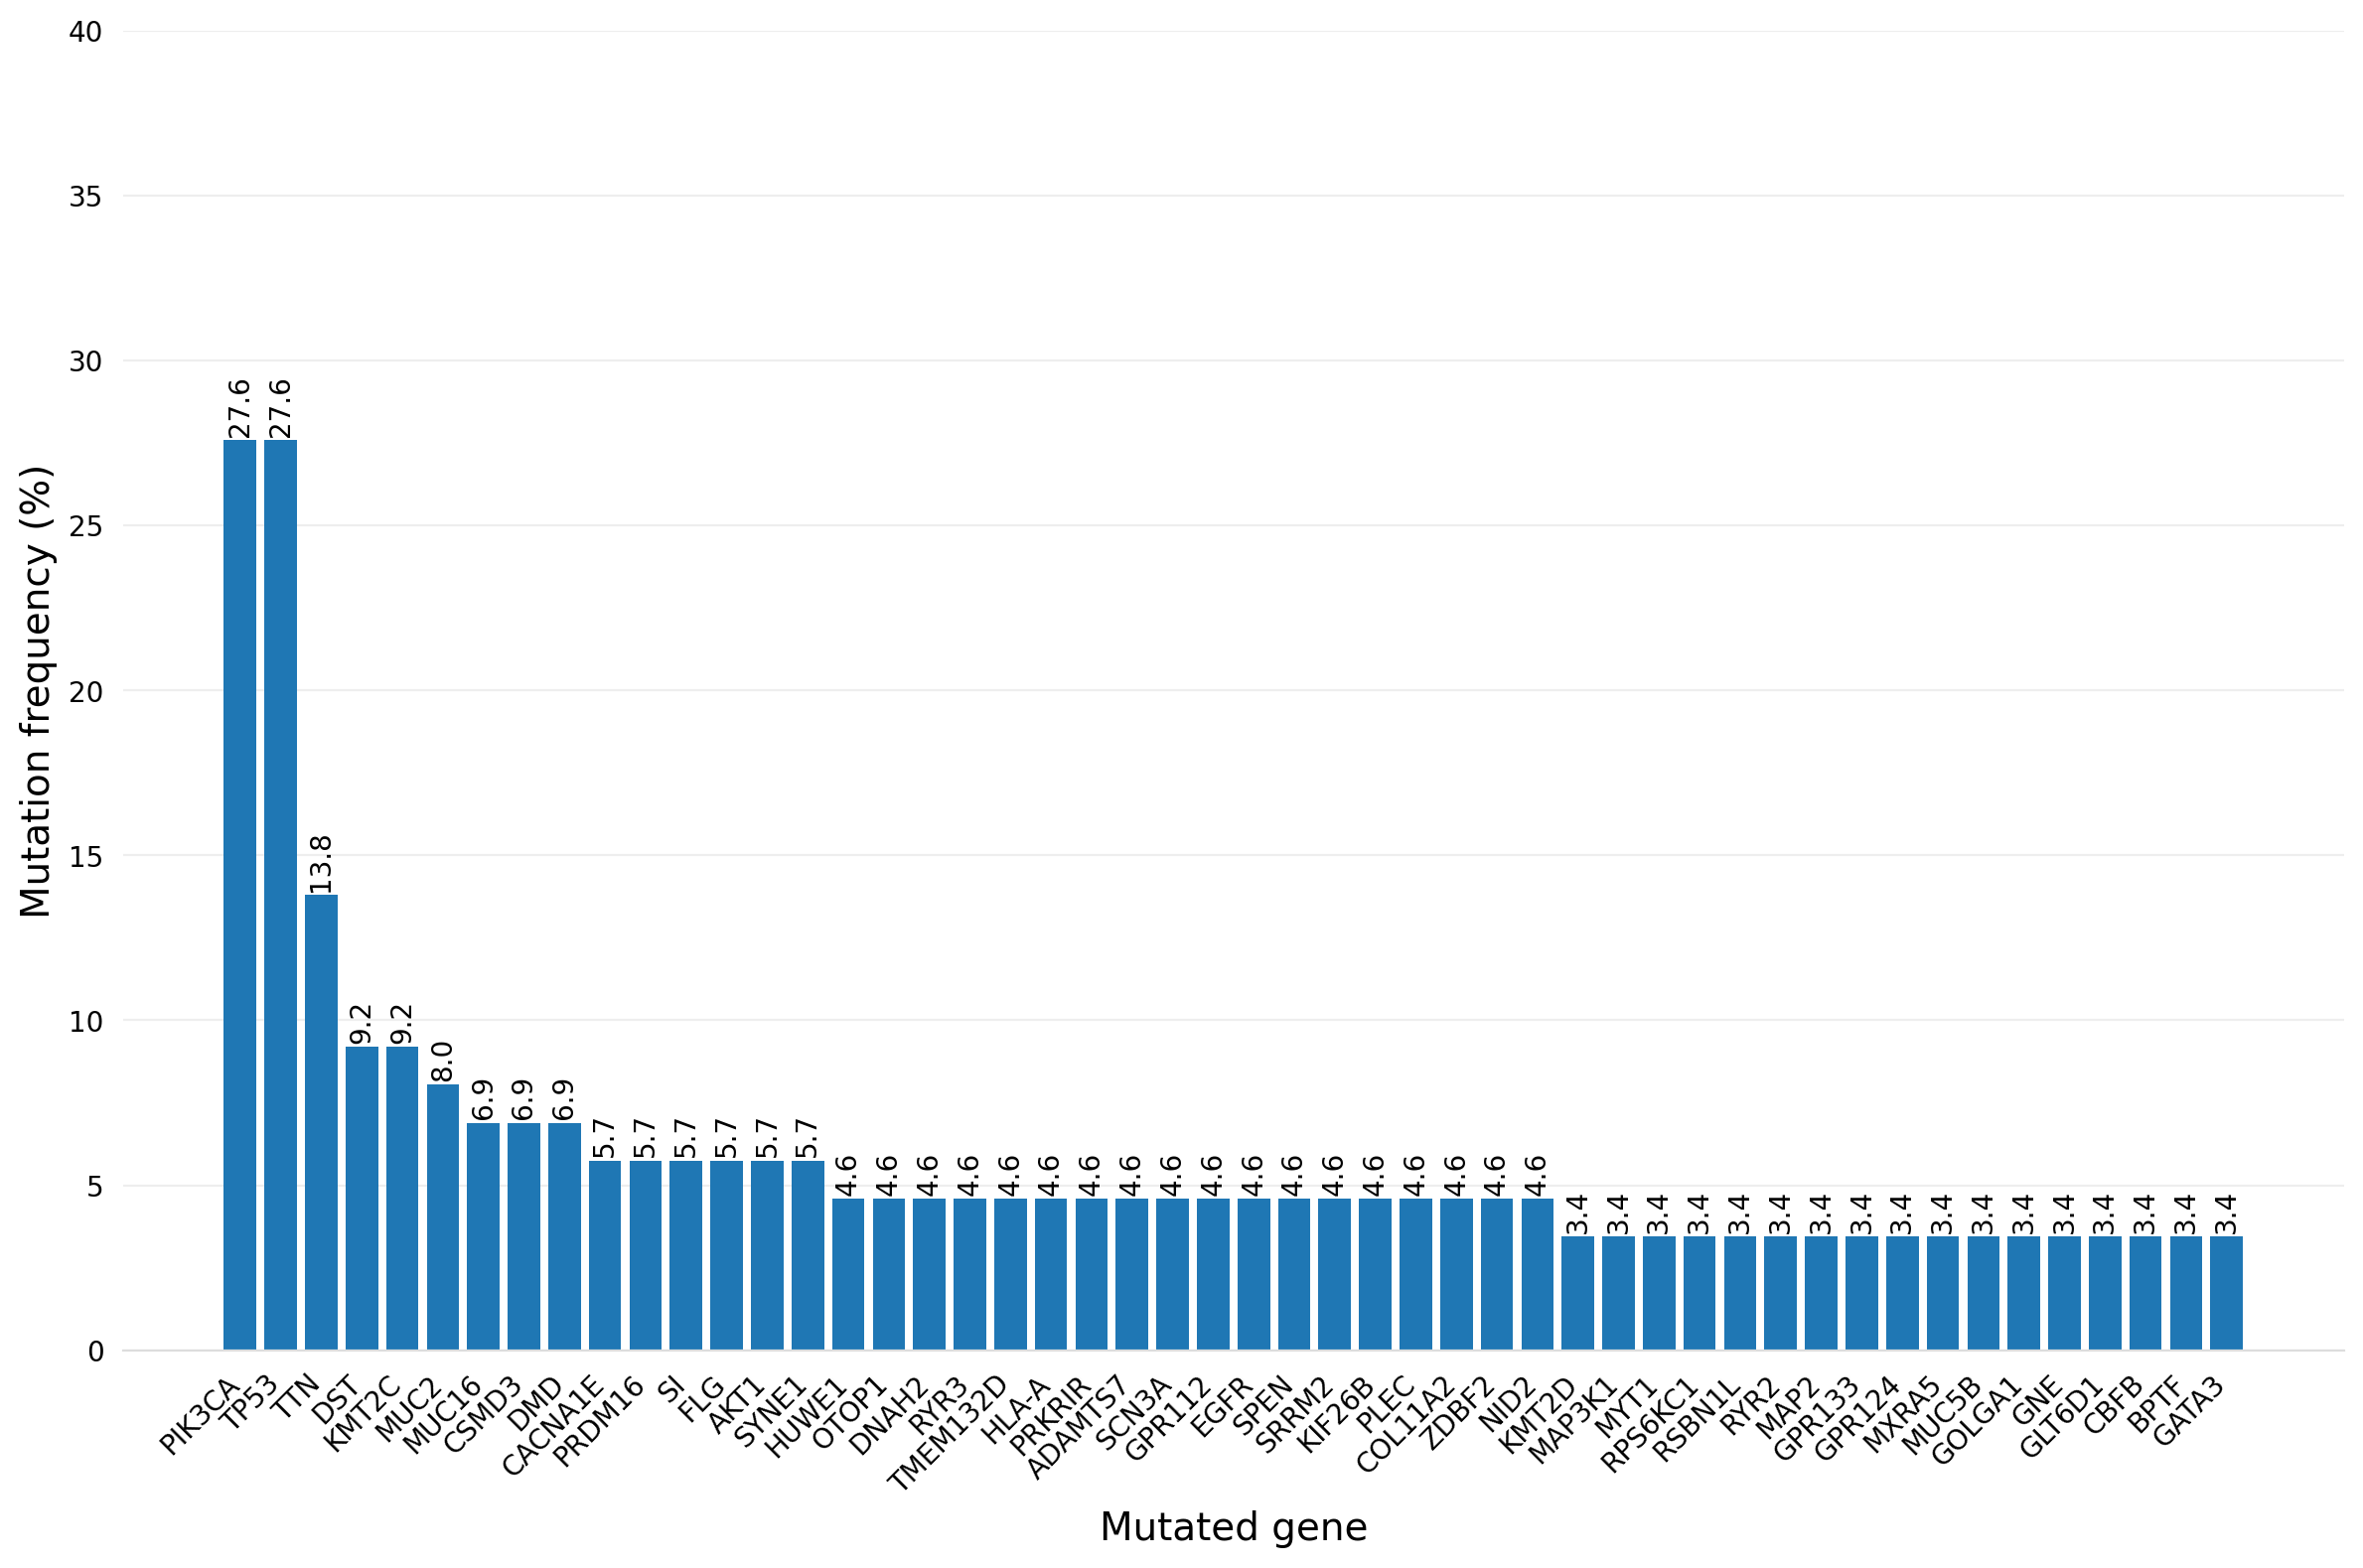

In [89]:
# increase the quality and resolution of the chart
from IPython.display import set_matplotlib_formats
import matplotlib_inline.backend_inline

matplotlib_inline.backend_inline.set_matplotlib_formats('retina')
# set default figure size.
plt.rcParams['figure.figsize'] = (12, 8)
fig, ax = plt.subplots()
h=ax.bar(highest_mutated_genes_ductal_NON_TN['Hugo_Symbol'], highest_mutated_genes_ductal_NON_TN['Mutation_frequency (%)'], label=mutated_gene_names)
xticks_pos = [0.65*patch.get_width() + patch.get_xy()[0] for patch in h]

_ = plt.xticks(xticks_pos, mutated_gene_names,  ha='right', rotation=45)
#plt.title('Highest mutated genes', fontsize=14)
plt.xlabel('Mutated gene', fontsize=14)
plt.ylabel('Mutation frequency (%)', fontsize=14)

plt.ylim(0, 40)

# First, let's remove the top, right and left spines (figure borders)
# which really aren't necessary for a bar chart.
# Also, make the bottom spine gray instead of black.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')

# Second, remove the ticks as well.
ax.tick_params(bottom=False, left=False)

# Third, add a horizontal grid (but keep the vertical grid hidden).
# Color the lines a light gray as well.
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

# Add text annotations to the top of the bars.
# Note, you'll have to adjust this slightly (the 0.3)
# with different data.
for bar in h:
  ax.text(
      bar.get_x() + bar.get_width() / 2,
      bar.get_height() + 0.3,
      round(bar.get_height(), 1),
      rotation='vertical',
      horizontalalignment='center'
  )


fig.tight_layout()